In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd
from matplotlib.patches import FancyArrowPatch
from ipywidgets import Output

In [ ]:
! gdown 1Wh9jIWUxTIdTTZ87E9IccoFz42NvlhMe

In [12]:
def get_Mean(x):
  den = (x.max(axis=0, keepdims=True) - x.min(axis=0, keepdims=True)).flatten()
  avg = (x.mean(axis=0, keepdims=True)).flatten()
  

  for i in range(len(x)):
    x[i, 0] = (x[i, 0] - avg[0]) / den[0]
    x[i, 1] = (x[i, 1] - avg[1]) / den[1]
  
  return x

def get_min_max_scale(x):
  min = x.min(axis=0, keepdims=True).flatten()
  denom = (x.max(axis=0, keepdims=True) - x.min(axis=0, keepdims=True)).flatten()

  for i in range(len(x)):
    x[i, 0] = (x[i, 0] - min[0]) / denom[0]
    x[i, 1] = (x[i, 1] - min[1]) / denom[1]
  
  return x

In [ ]:
data = pd.read_csv('data.txt')
data.info()
val = [float(x) for x in data.columns.str.strip()]
val[-1] = int(val[-1])
data.rename(columns = {'34.62365962451697': 'x1', '78.0246928153624': 'x2', '0': 'y'}, inplace=True)
new_row = pd.DataFrame({ 'x1': val[0], 'x2': val[1], 'y': val[2] }, index=[0])
data = pd.concat( [new_row, data.loc[:]] ).reset_index(drop=True)
data

In [ ]:
trainX = np.array( [ [x1, x2] for x1, x2 in zip(data['x1'], data['x2']) ] ) #(m,n)
trainY = np.array([y for y in data['y']])
print(trainX,trainY)

In [ ]:
trainx = get_min_max_scale(trainX)
trainx

In [ ]:
pos_label="y=1"
neg_label="y=0"
fig, ax = plt.subplots(1,1,figsize=(8,8))

pos = trainY == 1
neg = trainY == 0
print(pos.shape)

# Plot examples
ax.scatter(trainX[pos, 0], trainX[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(trainX[neg, 0], trainX[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='green', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

In [37]:
def getSigmoidValue(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))
    return g

def getLogisticCostValue(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = getSigmoidValue(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost

def getComputeGradientLogisticValue(X, y, w, b): 
    m,n = X.shape
    dj_dw = np.zeros((n,))                           
    dj_db = 0.

    for i in range(m):
        f_wb_i = getSigmoidValue(np.dot(X[i],w) + b)        
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
        
    return dj_db, dj_dw


def gradient_descent_graph(X, y, w_in, b_in, alpha, num_iters): 
    J_history = []
    w = copy.deepcopy(w_in) 
    b = b_in
    
    for i in range(num_iters):
        
        dj_db, dj_dw = getComputeGradientLogisticValue(X, y, w, b)   

        
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        if i<100000:      
            J_history.append( getLogisticCostValue(X, y, w, b) )


        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history 

tmp1 = np.array([1,1])
tmp2 = -3
print(getLogisticCostValue(trainX, trainX, tmp1, tmp2))

[1.0673406  1.09404693]


In [35]:
arr1 = np.array([1,1])
b_1 = -3
arr2 = np.array([1,1])
b_2 = -4

In [ ]:
w_tmp  = np.zeros_like(trainX[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent_graph(trainX, trainY, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

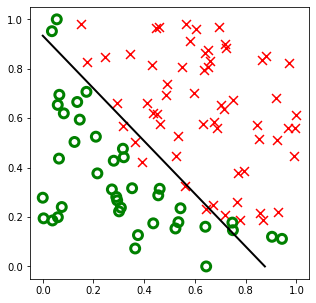

In [48]:
figure,plot = plt.subplots(1,1,figsize=(5,5))

plot.scatter(trainX[pos, 0], trainX[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
plot.scatter(trainX[neg, 0], trainX[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='green', lw=3)

x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]

plot.plot([0,x0],[x1,0], c='black', lw=2)
plt.show()